In [30]:
# Importing  library

import pandas as pd

df = pd.read_csv("vodafone_reviews.csv")

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Rating    10000 non-null  int64 
 1   Review    9423 non-null   object
 2   Name      9998 non-null   object
 3   Location  10000 non-null  object
 4   Date      10000 non-null  object
dtypes: int64(1), object(4)
memory usage: 390.8+ KB


In [31]:
df.head()

,Rating,Review,Name,Location,Date
0,1,"Trying to buy broadband through Uswitch, then ...",Alfie Calas,GB,2025-06-05T22:03:24.000Z
1,5,Sona did a great job either my trade in and co...,Julliette,GB,2025-06-05T21:51:17.000Z
2,1,"One of the worst , if not the worst when it co...",Vlad Ureche,GB,2025-06-05T21:28:36.000Z
3,1,How those people get 4.6 rate that’s a joke my...,Adam Farbotko,GB,2025-06-05T21:14:08.000Z
4,1,Held to ransom by a ‘reputable’ company. Purch...,Chloe,GB,2025-06-05T20:24:59.000Z


In [32]:
df.isnull().sum()


Rating        0
Review      577
Name          2
Location      0
Date          0
dtype: int64

In [33]:
df.Rating.value_counts()

Rating
5    9130
1     727
4      80
2      42
3      21
Name: count, dtype: int64

In [34]:
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # remove URLs
    text = re.sub(r"[^a-z\s]", '', text)  # keep letters only
    text = re.sub(r"\s+", ' ', text).strip()
    return text

df['Clean_Review'] = df['Review'].apply(clean_text)


In [35]:
df

,Rating,Review,Name,Location,Date,Clean_Review
0,1,"Trying to buy broadband through Uswitch, then ...",Alfie Calas,GB,2025-06-05T22:03:24.000Z,trying to buy broadband through uswitch then h...
1,5,Sona did a great job either my trade in and co...,Julliette,GB,2025-06-05T21:51:17.000Z,sona did a great job either my trade in and co...
2,1,"One of the worst , if not the worst when it co...",Vlad Ureche,GB,2025-06-05T21:28:36.000Z,one of the worst if not the worst when it come...
3,1,How those people get 4.6 rate that’s a joke my...,Adam Farbotko,GB,2025-06-05T21:14:08.000Z,how those people get rate thats a joke my full...
4,1,Held to ransom by a ‘reputable’ company. Purch...,Chloe,GB,2025-06-05T20:24:59.000Z,held to ransom by a reputable company purchase...
...,...,...,...,...,...,...
9995,1,"absolutely awful, been with vodaphone for 4 mo...",Ross Harker,GB,2025-03-05T11:25:39.000Z,absolutely awful been with vodaphone for month...
9996,1,Had a great experience- until we decided to mo...,Fern Jones,GB,2025-03-04T22:32:25.000Z,had a great experience until we decided to mov...
9997,5,Karan and Isaac were both amazing. Give them a...,Evan Calitz,GB,2025-03-04T22:25:37.000Z,karan and isaac were both amazing give them a ...
9998,5,Thank you mani your amazing,annalisa torciano,IT,2025-03-04T21:50:39.000Z,thank you mani your amazing


In [36]:
from textblob import TextBlob

df['Sentiment'] = df['Clean_Review'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [37]:
df

,Rating,Review,Name,Location,Date,Clean_Review,Sentiment
0,1,"Trying to buy broadband through Uswitch, then ...",Alfie Calas,GB,2025-06-05T22:03:24.000Z,trying to buy broadband through uswitch then h...,-0.020000
1,5,Sona did a great job either my trade in and co...,Julliette,GB,2025-06-05T21:51:17.000Z,sona did a great job either my trade in and co...,0.700000
2,1,"One of the worst , if not the worst when it co...",Vlad Ureche,GB,2025-06-05T21:28:36.000Z,one of the worst if not the worst when it come...,-0.200000
3,1,How those people get 4.6 rate that’s a joke my...,Adam Farbotko,GB,2025-06-05T21:14:08.000Z,how those people get rate thats a joke my full...,0.275000
4,1,Held to ransom by a ‘reputable’ company. Purch...,Chloe,GB,2025-06-05T20:24:59.000Z,held to ransom by a reputable company purchase...,-0.003634
...,...,...,...,...,...,...,...
9995,1,"absolutely awful, been with vodaphone for 4 mo...",Ross Harker,GB,2025-03-05T11:25:39.000Z,absolutely awful been with vodaphone for month...,-0.280000
9996,1,Had a great experience- until we decided to mo...,Fern Jones,GB,2025-03-04T22:32:25.000Z,had a great experience until we decided to mov...,0.100000
9997,5,Karan and Isaac were both amazing. Give them a...,Evan Calitz,GB,2025-03-04T22:25:37.000Z,karan and isaac were both amazing give them a ...,0.400000
9998,5,Thank you mani your amazing,annalisa torciano,IT,2025-03-04T21:50:39.000Z,thank you mani your amazing,0.600000


In [38]:
def get_sentiment_label(polarity):
    # Define sentiment labels based on polarity
    if polarity > 0.2:
        return 'positive'
    elif polarity < -0.2:
        return 'negative'
    else:
        return 'neutral'

df['Sentiment Label'] = df['Sentiment'].apply(get_sentiment_label)

In [39]:
df

,Rating,Review,Name,Location,Date,Clean_Review,Sentiment,Sentiment Label
0,1,"Trying to buy broadband through Uswitch, then ...",Alfie Calas,GB,2025-06-05T22:03:24.000Z,trying to buy broadband through uswitch then h...,-0.020000,neutral
1,5,Sona did a great job either my trade in and co...,Julliette,GB,2025-06-05T21:51:17.000Z,sona did a great job either my trade in and co...,0.700000,positive
2,1,"One of the worst , if not the worst when it co...",Vlad Ureche,GB,2025-06-05T21:28:36.000Z,one of the worst if not the worst when it come...,-0.200000,neutral
3,1,How those people get 4.6 rate that’s a joke my...,Adam Farbotko,GB,2025-06-05T21:14:08.000Z,how those people get rate thats a joke my full...,0.275000,positive
4,1,Held to ransom by a ‘reputable’ company. Purch...,Chloe,GB,2025-06-05T20:24:59.000Z,held to ransom by a reputable company purchase...,-0.003634,neutral
...,...,...,...,...,...,...,...,...
9995,1,"absolutely awful, been with vodaphone for 4 mo...",Ross Harker,GB,2025-03-05T11:25:39.000Z,absolutely awful been with vodaphone for month...,-0.280000,negative
9996,1,Had a great experience- until we decided to mo...,Fern Jones,GB,2025-03-04T22:32:25.000Z,had a great experience until we decided to mov...,0.100000,neutral
9997,5,Karan and Isaac were both amazing. Give them a...,Evan Calitz,GB,2025-03-04T22:25:37.000Z,karan and isaac were both amazing give them a ...,0.400000,positive
9998,5,Thank you mani your amazing,annalisa torciano,IT,2025-03-04T21:50:39.000Z,thank you mani your amazing,0.600000,positive


 STEP 3: Churn Keyword Flags

In [40]:
churn_keywords = ['cancel', 'leave', 'switch', 'disconnect', 'terminate', 'quit', 'move', 'gone']

df['Churn_Keyword'] = df['Clean_Review'].apply(
    lambda x: int(any(word in x for word in churn_keywords))
)

In [41]:
df = df[df['Rating'].isin([1, 2, 4, 5])].copy()
df['Churn'] = df['Rating'].apply(lambda x: 1 if x <= 2 else 0)


In [42]:
df['Sentiment'].value_counts()



Sentiment
 0.000000    834
 0.200000    566
 0.800000    361
 0.500000    304
 1.000000    255
            ... 
 0.348333      1
-0.028571      1
 0.444167      1
 0.067885      1
 0.232667      1
Name: count, Length: 2867, dtype: int64

In [43]:
df['Churn'].value_counts()
pd.crosstab(df['Churn'], df['Sentiment'])

Sentiment,-1.000000,-0.910000,-0.900000,-0.833333,-0.800000,-0.750000,-0.740000,-0.725000,-0.715000,-0.688061,...,0.902500,0.910000,0.931667,0.933333,0.950000,0.953333,0.955000,0.976667,0.984444,1.000000
Churn,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,1,68,1,6,20,7,7,2,1,255
1,8,1,1,1,3,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df.head()

,Rating,Review,Name,Location,Date,Clean_Review,Sentiment,Sentiment Label,Churn_Keyword,Churn
0,1,"Trying to buy broadband through Uswitch, then ...",Alfie Calas,GB,2025-06-05T22:03:24.000Z,trying to buy broadband through uswitch then h...,-0.020000,neutral,1,1
1,5,Sona did a great job either my trade in and co...,Julliette,GB,2025-06-05T21:51:17.000Z,sona did a great job either my trade in and co...,0.700000,positive,0,0
2,1,"One of the worst , if not the worst when it co...",Vlad Ureche,GB,2025-06-05T21:28:36.000Z,one of the worst if not the worst when it come...,-0.200000,neutral,0,1
3,1,How those people get 4.6 rate that’s a joke my...,Adam Farbotko,GB,2025-06-05T21:14:08.000Z,how those people get rate thats a joke my full...,0.275000,positive,0,1
4,1,Held to ransom by a ‘reputable’ company. Purch...,Chloe,GB,2025-06-05T20:24:59.000Z,held to ransom by a reputable company purchase...,-0.003634,neutral,1,1


In [45]:
df['Churn_Keyword'].value_counts()

Churn_Keyword
0    9328
1     651
Name: count, dtype: int64

In [46]:
df['Churn'].value_counts()

Churn
0    9210
1     769
Name: count, dtype: int64

In [47]:
df['Date'] = pd.to_datetime(df['Date']).copy()


In [48]:
df['Review_Date'] = df['Date'].dt.date.copy()
df['Review_Time'] = df['Date'].dt.time.copy()

df.head()

,Rating,Review,Name,Location,Date,Clean_Review,Sentiment,Sentiment Label,Churn_Keyword,Churn,Review_Date,Review_Time
0,1,"Trying to buy broadband through Uswitch, then ...",Alfie Calas,GB,2025-06-05 22:03:24+00:00,trying to buy broadband through uswitch then h...,-0.020000,neutral,1,1,2025-06-05,22:03:24
1,5,Sona did a great job either my trade in and co...,Julliette,GB,2025-06-05 21:51:17+00:00,sona did a great job either my trade in and co...,0.700000,positive,0,0,2025-06-05,21:51:17
2,1,"One of the worst , if not the worst when it co...",Vlad Ureche,GB,2025-06-05 21:28:36+00:00,one of the worst if not the worst when it come...,-0.200000,neutral,0,1,2025-06-05,21:28:36
3,1,How those people get 4.6 rate that’s a joke my...,Adam Farbotko,GB,2025-06-05 21:14:08+00:00,how those people get rate thats a joke my full...,0.275000,positive,0,1,2025-06-05,21:14:08
4,1,Held to ransom by a ‘reputable’ company. Purch...,Chloe,GB,2025-06-05 20:24:59+00:00,held to ransom by a reputable company purchase...,-0.003634,neutral,1,1,2025-06-05,20:24:59


In [49]:
df['Weekday'] = df['Date'].dt.day_name()


In [50]:
df['Month'] = df['Date'].dt.month_name()

df.head()

,Rating,Review,Name,Location,Date,Clean_Review,Sentiment,Sentiment Label,Churn_Keyword,Churn,Review_Date,Review_Time,Weekday,Month
0,1,"Trying to buy broadband through Uswitch, then ...",Alfie Calas,GB,2025-06-05 22:03:24+00:00,trying to buy broadband through uswitch then h...,-0.020000,neutral,1,1,2025-06-05,22:03:24,Thursday,June
1,5,Sona did a great job either my trade in and co...,Julliette,GB,2025-06-05 21:51:17+00:00,sona did a great job either my trade in and co...,0.700000,positive,0,0,2025-06-05,21:51:17,Thursday,June
2,1,"One of the worst , if not the worst when it co...",Vlad Ureche,GB,2025-06-05 21:28:36+00:00,one of the worst if not the worst when it come...,-0.200000,neutral,0,1,2025-06-05,21:28:36,Thursday,June
3,1,How those people get 4.6 rate that’s a joke my...,Adam Farbotko,GB,2025-06-05 21:14:08+00:00,how those people get rate thats a joke my full...,0.275000,positive,0,1,2025-06-05,21:14:08,Thursday,June
4,1,Held to ransom by a ‘reputable’ company. Purch...,Chloe,GB,2025-06-05 20:24:59+00:00,held to ransom by a reputable company purchase...,-0.003634,neutral,1,1,2025-06-05,20:24:59,Thursday,June


In [51]:
# Create review length features
df['Review_Length'] = df['Clean_Review'].str.len()
df['Word_Count'] = df['Clean_Review'].str.split().str.len()

In [52]:
df.head()

,Rating,Review,Name,Location,Date,Clean_Review,Sentiment,Sentiment Label,Churn_Keyword,Churn,Review_Date,Review_Time,Weekday,Month,Review_Length,Word_Count
0,1,"Trying to buy broadband through Uswitch, then ...",Alfie Calas,GB,2025-06-05 22:03:24+00:00,trying to buy broadband through uswitch then h...,-0.020000,neutral,1,1,2025-06-05,22:03:24,Thursday,June,280,48
1,5,Sona did a great job either my trade in and co...,Julliette,GB,2025-06-05 21:51:17+00:00,sona did a great job either my trade in and co...,0.700000,positive,0,0,2025-06-05,21:51:17,Thursday,June,68,13
2,1,"One of the worst , if not the worst when it co...",Vlad Ureche,GB,2025-06-05 21:28:36+00:00,one of the worst if not the worst when it come...,-0.200000,neutral,0,1,2025-06-05,21:28:36,Thursday,June,154,34
3,1,How those people get 4.6 rate that’s a joke my...,Adam Farbotko,GB,2025-06-05 21:14:08+00:00,how those people get rate thats a joke my full...,0.275000,positive,0,1,2025-06-05,21:14:08,Thursday,June,240,44
4,1,Held to ransom by a ‘reputable’ company. Purch...,Chloe,GB,2025-06-05 20:24:59+00:00,held to ransom by a reputable company purchase...,-0.003634,neutral,1,1,2025-06-05,20:24:59,Thursday,June,1620,320


In [53]:
df.columns

Index(['Rating', 'Review', 'Name', 'Location', 'Date', 'Clean_Review',
       'Sentiment', 'Sentiment Label', 'Churn_Keyword', 'Churn', 'Review_Date',
       'Review_Time', 'Weekday', 'Month', 'Review_Length', 'Word_Count'],
      dtype='object')

## Modelling

In [54]:
# Selecting relevant features and target for the model

model_features = [
    'Sentiment',
    'Churn_Keyword',
    'Review_Length',
    'Word_Count',
    'Weekday',
    'Month'
]

target = 'Churn'


In [55]:
df_model = df[model_features + [target]].copy()


In [56]:
df_model = pd.get_dummies(df_model, columns=['Weekday', 'Month'], drop_first=True)


In [57]:
df_model

,Sentiment,Churn_Keyword,Review_Length,Word_Count,Churn,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,Month_June,Month_March,Month_May
0,-0.020000,1,280,48,1,False,False,False,True,False,False,True,False,False
1,0.700000,0,68,13,0,False,False,False,True,False,False,True,False,False
2,-0.200000,0,154,34,1,False,False,False,True,False,False,True,False,False
3,0.275000,0,240,44,1,False,False,False,True,False,False,True,False,False
4,-0.003634,1,1620,320,1,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.280000,0,261,48,1,False,False,False,False,False,True,False,True,False
9996,0.100000,1,635,123,1,False,False,False,False,True,False,False,True,False
9997,0.400000,0,63,12,0,False,False,False,False,True,False,False,True,False
9998,0.600000,0,27,5,0,False,False,False,False,True,False,False,True,False


In [58]:
from sklearn.model_selection import train_test_split

X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)


In [60]:
print("Logistic Regression Results:")
print(classification_report(y_test, log_preds))

print("Random Forest Results:")
print(classification_report(y_test, rf_preds))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1836
           1       0.92      0.78      0.84       160

    accuracy                           0.98      1996
   macro avg       0.95      0.88      0.91      1996
weighted avg       0.98      0.98      0.98      1996

Random Forest Results:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1836
           1       0.90      0.81      0.86       160

    accuracy                           0.98      1996
   macro avg       0.94      0.90      0.92      1996
weighted avg       0.98      0.98      0.98      1996



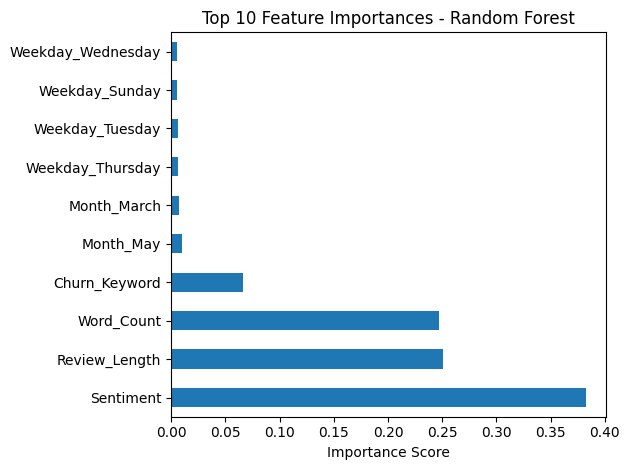

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

feat_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_importance.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [62]:
from sklearn.metrics import classification_report

y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1836
           1       0.90      0.81      0.86       160

    accuracy                           0.98      1996
   macro avg       0.94      0.90      0.92      1996
weighted avg       0.98      0.98      0.98      1996



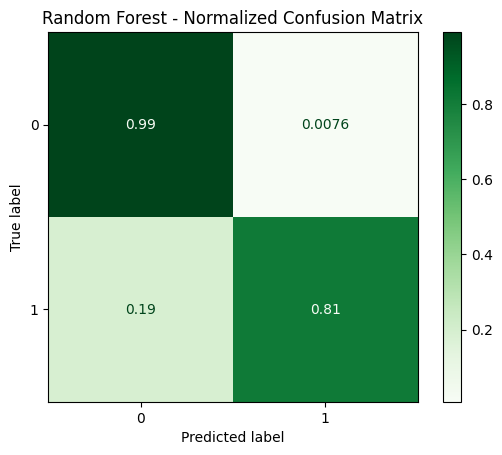

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap="Greens", normalize='true')
plt.title("Random Forest - Normalized Confusion Matrix")
plt.show()


In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


In [65]:
param_grid = {
    'n_estimators': [100, 200],            # number of trees
    'max_depth': [None, 10, 20],           # depth of each tree
    'min_samples_split': [2, 5],           # min samples to split a node
    'min_samples_leaf': [1, 2],            # min samples at a leaf node
    'max_features': ['sqrt']               # sqrt is often best for classification
}


In [66]:
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1',            # use 'f1' to balance precision/recall for churn class
    cv=5,
    n_jobs=-1,               # use all cores
    verbose=1
)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 10, ...], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], ...}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [67]:
best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)
print("Best Parameters:", grid_search.best_params_)
print(classification_report(y_test, y_pred))


Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1836
           1       0.92      0.81      0.86       160

    accuracy                           0.98      1996
   macro avg       0.95      0.90      0.92      1996
weighted avg       0.98      0.98      0.98      1996



In [68]:
#rename the model to final_model
final_model = best_rf


In [70]:
import joblib
joblib.dump(final_model, 'churn_model.pkl')


['churn_model.pkl']

In [ ]:
df.to_csv("Vodaphone_review_dataset.csv", index=False)